# SDR

## 入力シーケンスの作成

最初のステップは、入力シーケンスを作成することです。以下に示すように、私はNumPyを使用して0から9までの数字のシーケンスを作成しています。

In [1]:
import numpy as np

# np.arange 等差数列を配列ndarrayとして生成する
cycleArray = np.arange(0, 10, 1)
print(cycleArray)

[0 1 2 3 4 5 6 7 8 9]


## ビット表現

ここまでで、各種類の入力をhtm.coreが理解できるビット表現にエンコードする必要があることをご存じでしょう。したがって、シーケンス内の個々の数値をゼロ（非アクティブビット）と1（アクティブビット）の配列に変換する必要があります。

もう1つ注意する点は、**一時記憶は期待どおり動作するために、実際にはリスト8のアクティブビットが必要である**ことです。

10個の数値（0〜9）があり、すべての数値を表すために少なくとも8つのアクティブビットが必要であることを念頭に置いて、配列サイズを80に設定します。次に、これらの数値を反復処理して、以下に示すようにアクティブビットを設定できます。

In [11]:
import numpy as np

arraySize = 80

# np.arange 等差数列を配列ndarrayとして生成する
cycleArray = np.arange(0, 10, 1)

for sensorValue in cycleArray:
    # np.zeros 配列の全要素を0で初期化する
    sensorValueBits = np.zeros(arraySize)
    sensorValueBits[sensorValue * 8 : sensorValue * 8 + 8] = 1
    # format(value[, format_spec]) value を format_spec で制御される 
    # "書式化された" 表現に変換します
    print(format(sensorValue, '>2') + ' |' , sensorValueBits)

 0 | [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
 1 | [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
 2 | [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
 3 | [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


## 美化

結果は少し醜く見えます。それでは、`formatArray`という名前のpython関数を作成して、ビット配列をより読みやすいものに変換して、それを修正してみましょう。

In [76]:
import numpy as np

def formatArray(array):
  result = ''
  for i in range(array.size):
    if i > 0 and i % 8 == 0:
      result += ' '
    # '.0f'で小数点以下の表示を0に
    result += format(array[i],'.0f')
  return result

arraySize = 80
cycleArray = np.arange(0, 10, 1)

for sensorValue in cycleArray:
    # np.zeros 配列の全要素を0で初期化する
    sensorValueBits = np.zeros(arraySize)
    sensorValueBits[sensorValue * 8 : sensorValue * 8 + 8] = 1

    # format(value[, format_spec]) value を format_spec で制御される 
    # "書式化された" 表現に変換します
    print('V:' + format(sensorValue, '>2')  + ' |', formatArray(sensorValueBits))

V: 0 | 11111111 00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000000
V: 1 | 00000000 11111111 00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000000
V: 2 | 00000000 00000000 11111111 00000000 00000000 00000000 00000000 00000000 00000000 00000000
V: 3 | 00000000 00000000 00000000 11111111 00000000 00000000 00000000 00000000 00000000 00000000
V: 4 | 00000000 00000000 00000000 00000000 11111111 00000000 00000000 00000000 00000000 00000000
V: 5 | 00000000 00000000 00000000 00000000 00000000 11111111 00000000 00000000 00000000 00000000
V: 6 | 00000000 00000000 00000000 00000000 00000000 00000000 11111111 00000000 00000000 00000000
V: 7 | 00000000 00000000 00000000 00000000 00000000 00000000 00000000 11111111 00000000 00000000
V: 8 | 00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000000 11111111 00000000
V: 9 | 00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000000 11111111


## スパース分散表現への配列

バイト配列をSDRへ変換する前に、関連するドキュメントをざっと見ておくと便利です。次のコマンドを使用して、インタラクティブなPythonシェルまたはJupyterで表示します。

In [73]:
import htm.bindings.sdr
help(htm.bindings.sdr.SDR)

Help on class SDR in module htm.bindings.sdr:

class SDR(pybind11_builtins.pybind11_object)
 |  Sparse Distributed Representation
 |  
 |  This class manages the specification and momentary value of a Sparse Distributed
 |  Representation (SDR).  An SDR is a group of boolean values which represent the
 |  state of a group of neurons or their associated processes.
 |  
 |  SDR's have three commonly used data formats which are:
 |  *   dense
 |  *   sparse
 |  *   coordinates
 |  The SDR class has three magic properties, one for each of these data formats.
 |  These properties are the primary way of accessing the SDR's data.  When these
 |  properties are read from, the data is automatically converted to the requested
 |  format and is cached so getting a value in one format many times incurs no extra
 |  performance cost.  Assigning to the SDR via any one of these properties clears
 |  the cached values and causes them to be recomputed as needed.
 |  
 |  Example usage:
 |      # Make a

それを読むと、次のことに気付くでしょう。

SDRに値を割り当てるには、PythonからC++にデータをコピーする必要があります。このコピー操作を回避するには、`sdr.dense`をインプレースで変更し、それ自体に割り当てます。このクラスは、自身のデータが与えられていることを検出し、コピー操作を省略します。

インプレース割り当ての使用例：

```python
X = SDR((1000, 1000)) # Initial value is all zeros
data = X.dense
data[ 0, 4] = 1
data[444, 444] = 1
X.dense = data
X.sparse -> [ 4, 444444 ]
```

それは有用な情報です。

したがって、最初に配列と同じサイズのSDRオブジェクト（14行）を作成し、次に、エンコードされたビットを推奨される方法（17行および20行）に割り当てます。

In [77]:
import numpy as np
from htm.bindings.sdr import SDR

def formatArray(array):
  result = ''
  for i in range(array.size):
    if i > 0 and i % 8 == 0:
      result += ' '
     # '.0f'で小数点以下の表示を0に
    result += format(array[i],'.0f')
  return result

arraySize = 80
cycleArray = np.arange(0, 10, 1)
# SDRのサイズを指定
inputSDR = SDR( arraySize )

for sensorValue in cycleArray:
    sensorValueBits = inputSDR.dense
    # np.zeros 配列の全要素を0で初期化する
    sensorValueBits = np.zeros(arraySize)
    sensorValueBits[sensorValue * 8:sensorValue * 8 + 8] = 1
    # sdr.dense SDRに値を割り当てる
    inputSDR.dense = sensorValueBits

    # format(value[, format_spec]) value を format_spec で制御される 
    # "書式化された" 表現に変換します
    print(sensorValue, ':', formatArray(sensorValueBits))

0 : 11111111 00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000000
1 : 00000000 11111111 00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000000
2 : 00000000 00000000 11111111 00000000 00000000 00000000 00000000 00000000 00000000 00000000
3 : 00000000 00000000 00000000 11111111 00000000 00000000 00000000 00000000 00000000 00000000
4 : 00000000 00000000 00000000 00000000 11111111 00000000 00000000 00000000 00000000 00000000
5 : 00000000 00000000 00000000 00000000 00000000 11111111 00000000 00000000 00000000 00000000
6 : 00000000 00000000 00000000 00000000 00000000 00000000 11111111 00000000 00000000 00000000
7 : 00000000 00000000 00000000 00000000 00000000 00000000 00000000 11111111 00000000 00000000
8 : 00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000000 11111111 00000000
9 : 00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000000 11111111


これを実行すると、実際には出力の違いに気付くことはありません。ただし、エラーが発生しない限り、SDRへの割り当ては成功しています。

In [45]:
import numpy as np
from htm.bindings.sdr import SDR

def formatArray(array):
  result = ''
  for i in range(array.size):
    if i > 0 and i % 8 == 0:
      result += ' '
     # '.0f'で小数点以下の表示を0に
    result += format(array[i],'.0f')
  return result

arraySize = 80
cycleArray = np.arange(0, 10, 1)
# SDRのサイズを指定
inputSDR = SDR( arraySize )

for sensorValue in cycleArray:
    sensorValueBits = inputSDR.dense
    # np.zeros 配列の全要素を0で初期化する
    sensorValueBits = np.zeros(arraySize)
    sensorValueBits[sensorValue * 8:sensorValue * 8 + 8] = 1
    # sdr.dense SDRに値を割り当てる
    inputSDR.dense = sensorValueBits
   
    print(sensorValue, ':', inputSDR)

0 : SDR( 80 ) 0, 1, 2, 3, 4, 5, 6, 7
1 : SDR( 80 ) 8, 9, 10, 11, 12, 13, 14, 15
2 : SDR( 80 ) 16, 17, 18, 19, 20, 21, 22, 23
3 : SDR( 80 ) 24, 25, 26, 27, 28, 29, 30, 31
4 : SDR( 80 ) 32, 33, 34, 35, 36, 37, 38, 39
5 : SDR( 80 ) 40, 41, 42, 43, 44, 45, 46, 47
6 : SDR( 80 ) 48, 49, 50, 51, 52, 53, 54, 55
7 : SDR( 80 ) 56, 57, 58, 59, 60, 61, 62, 63
8 : SDR( 80 ) 64, 65, 66, 67, 68, 69, 70, 71
9 : SDR( 80 ) 72, 73, 74, 75, 76, 77, 78, 79


In [46]:
from htm.bindings.sdr import SDR, Metrics
A = SDR( 2000 )
M = Metrics( A, period = 1000 )  # This will automatically track SDR A.
for i in range( 345 ):
    A.randomize( sparsity = .10 )
print( M )

SDR( 2000 )
    Sparsity Min/Mean/Std/Max 0.1 / 0.0999997 / 1.33063e-06 / 0.1
    Activation Frequency Min/Mean/Std/Max 0.057971 / 0.1 / 0.0158821 / 0.168116
    Entropy 0.995682
    Overlap Min/Mean/Std/Max 0.04 / 0.0996366 / 0.0204832 / 0.17


In [47]:
import numpy as np
from htm.bindings.sdr import SDR

sample=np.array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0])
print(sample)

[0 0 0 1 0 1 0 1 1 0 0 0 0 0 0]


In [48]:
print(sample.shape)

(15,)


In [49]:
inputSDR = SDR( sample.shape )
print(inputSDR)

SDR( 15 )


In [50]:
inputSDR.dense=sample
print(inputSDR.dense)

[0 0 0 1 0 1 0 1 1 0 0 0 0 0 0]


In [51]:
print(inputSDR)

SDR( 15 ) 3, 5, 7, 8


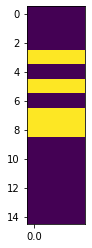

In [56]:
rf = np.zeros([ 15, 4 ], dtype=np.uint8)

for i in range(4):
  rf[ :, i ] = inputSDR.dense

plt.imshow(rf, interpolation='nearest')

n_ticks = 1
plt.xticks( np.linspace(0, 15-1, n_ticks),
          np.linspace(0, 15, n_ticks))
plt.show()